## import packages

In [71]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### connect to SQL

In [72]:
conn = sqlite3.connect('../data/wdi_data.db')  

## fertility_rate
### table

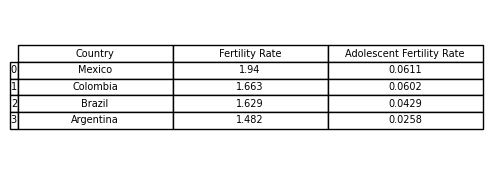

In [73]:
# SQL query
query = """
SELECT 
    country,
    fertility_rate,
    ROUND(adolescent_fertility_rate/1000, 4) AS ado_fertility_rate
FROM wdi_data
WHERE fertility_rate IS NOT NULL AND adolescent_fertility_rate IS NOT NULL
ORDER BY fertility_rate DESC;
"""
df1 = pd.read_sql_query(query, conn)

# save an image of the table:
fig, ax = plt.subplots(figsize = (6,2))
ax.axis("off")
table = ax.table(cellText = df1.values,
                 colLabels = ["Country", "Fertility Rate", "Adolescent Fertility Rate"],
                 rowLabels = df1.index,
                 loc = "center",
                 cellLoc = "center")
plt.savefig("../website_version/figures/fr_tab.png")

### plot

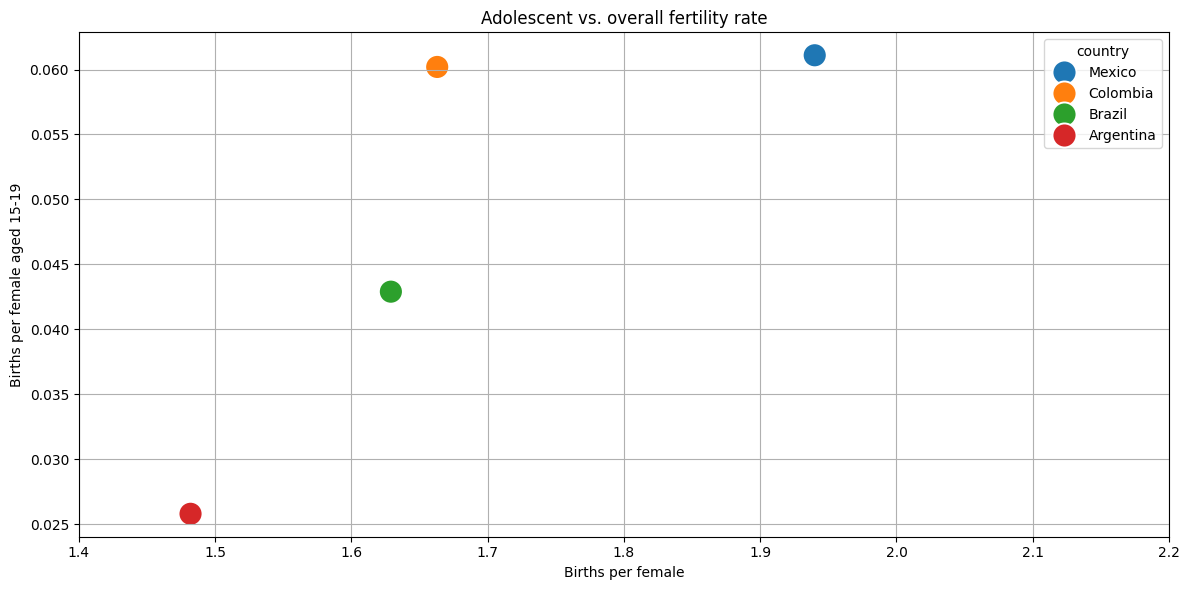

In [74]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df1, 
    x='fertility_rate', y='ado_fertility_rate', 
    hue='country',
    s = 300
)

plt.grid(True)
plt.xlim(1.4, 2.2)
plt.title('Adolescent vs. overall fertility rate')
plt.ylabel('Births per female aged 15-19')
plt.xlabel('Births per female')
plt.tight_layout()
plt.savefig('../website_version/figures/fertility_rate.png')

## child_mortality
### table

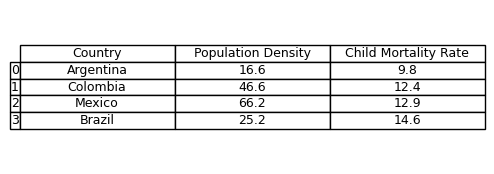

In [75]:
# SQL query
query = """
SELECT 
    country,
    ROUND(population_density, 1) AS pop_density,
    under_5_mortality_rate
FROM wdi_data
WHERE population_density IS NOT NULL AND under_5_mortality_rate IS NOT NULL
ORDER BY under_5_mortality_rate;
"""
df2 = pd.read_sql_query(query, conn)

# save an image of the table:
fig, ax = plt.subplots(figsize = (6,2))
ax.axis("off")
table = ax.table(cellText = df2.values,
                 colLabels = ["Country", "Population Density", "Child Mortality Rate"],
                 rowLabels = df2.index,
                 loc = "center",
                 cellLoc = "center")
plt.savefig("../website_version/figures/cm_tab.png")

### plot

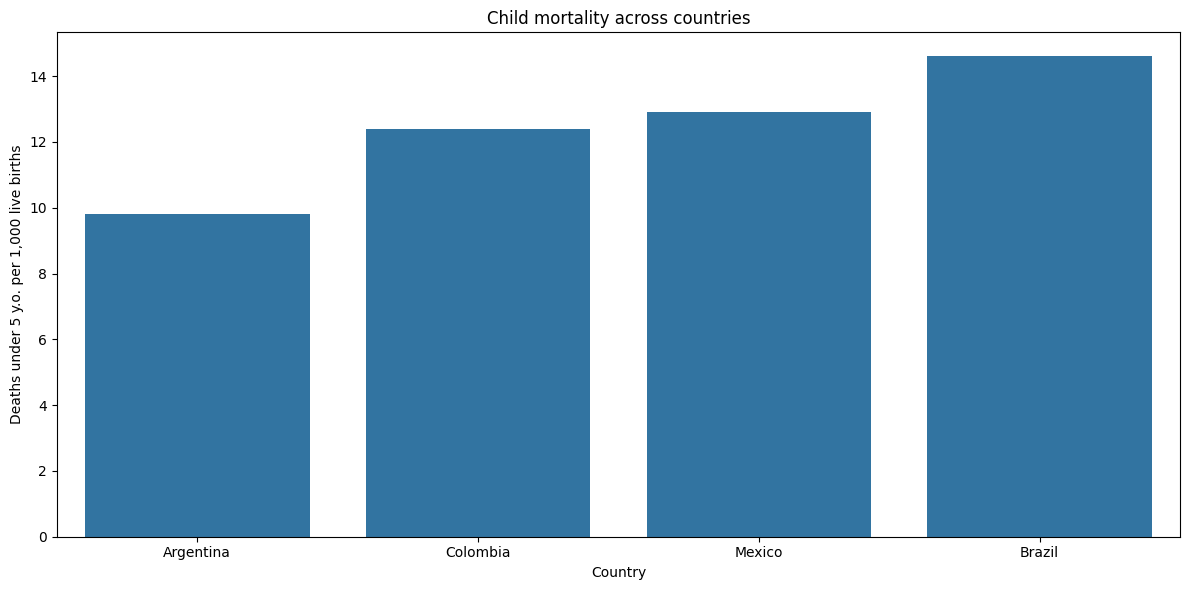

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df2, 
    x='country', y='under_5_mortality_rate'
)

plt.title('Child mortality across countries')
plt.ylabel('Deaths under 5 y.o. per 1,000 live births')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('../website_version/figures/child_mortality.png')

## pop_decline
### table

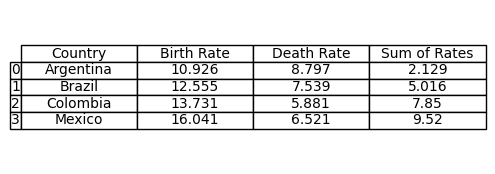

In [77]:
# SQL query
query = """
SELECT 
    country,
    birth_rate,
    death_rate,
    ROUND((birth_rate - death_rate), 3) AS circle_of_life
FROM wdi_data
WHERE birth_rate IS NOT NULL AND death_rate IS NOT NULL
ORDER BY circle_of_life ASC;
"""
df3 = pd.read_sql_query(query, conn)

# save an image of the table:
fig, ax = plt.subplots(figsize = (6,2))
ax.axis("off")
table = ax.table(cellText = df3.values,
                 colLabels = ["Country", "Birth Rate", "Death Rate", "Sum of Rates"],
                 rowLabels = df3.index,
                 loc = "center",
                 cellLoc = "center")
plt.savefig("../website_version/figures/pd_tab.png")

### plot

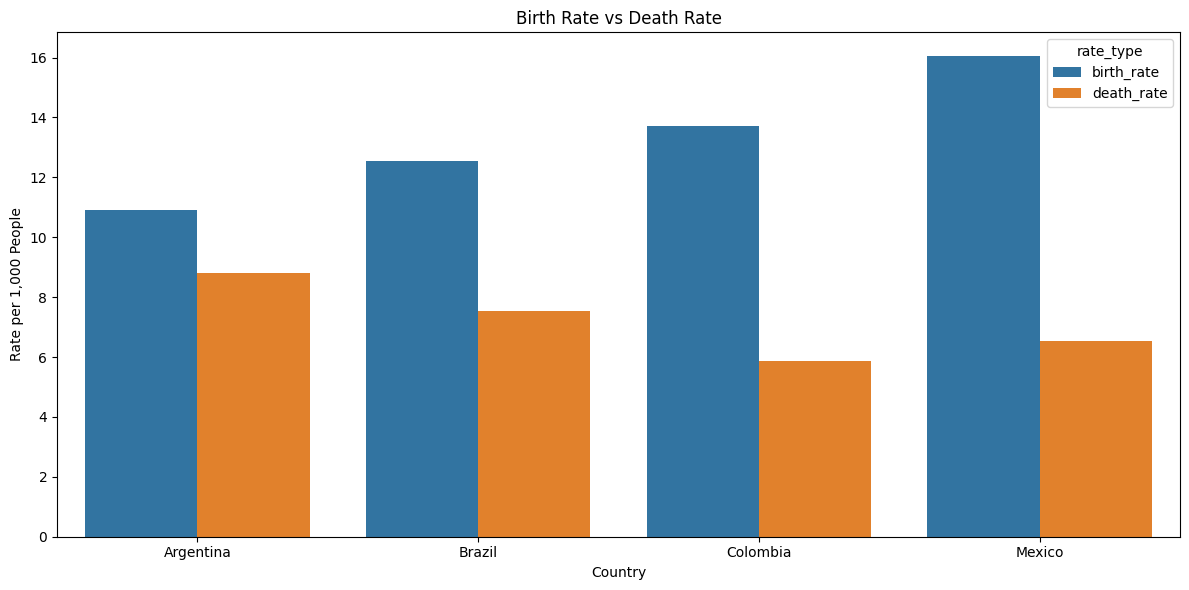

In [78]:
# Melt the dataframe to long format
df_melted = pd.melt(
    df3, 
    id_vars='country', 
    value_vars=['birth_rate', 'death_rate'], 
    var_name='rate_type', 
    value_name='rate'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted, 
    x='country', y='rate', 
    hue='rate_type'
)

plt.title('Birth Rate vs Death Rate')
plt.ylabel('Rate per 1,000 People')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('../website_version/figures/pop_decline.png')

## pop_growth
### table

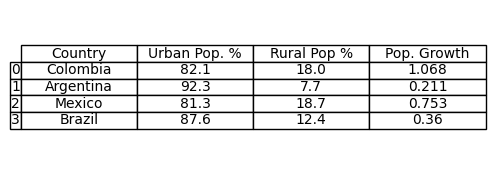

In [79]:
# SQL query
query = """
SELECT 
    country,
    ROUND(urban_population_percent, 1) AS urban_population_percent,
    ROUND(rural_population_percent, 1) AS rural_population_percent,
    ROUND(population_growth, 3) AS population_growth
FROM wdi_data
WHERE 
    urban_population_percent IS NOT NULL 
    AND population_growth IS NOT NULL
"""
df4 = pd.read_sql_query(query, conn)

# save an image of the table:
fig, ax = plt.subplots(figsize = (6,2))
ax.axis("off")
table = ax.table(cellText = df4.values,
                 colLabels = ["Country", "Urban Pop. %", "Rural Pop %", "Pop. Growth"],
                 rowLabels = df4.index,
                 loc = "center",
                 cellLoc = "center")
plt.savefig("../website_version/figures/pg_tab.png")

### plot

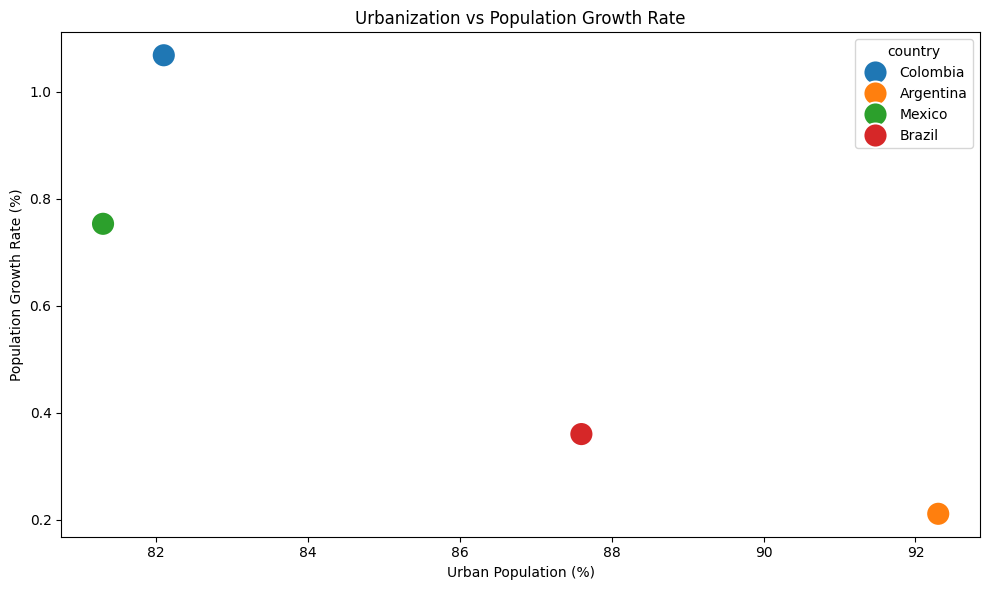

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df4,
    x="urban_population_percent",
    y="population_growth",
    hue="country",
    s = 300
)

plt.xlabel("Urban Population (%)")
plt.ylabel("Population Growth Rate (%)")
plt.title("Urbanization vs Population Growth Rate")
plt.tight_layout()
plt.savefig('../website_version/figures/pop_growth.png')